In [41]:
import numpy as np
import matplotlib.pyplot as plt
x = np.load("./x.npy")
x_hat = np.load("./x_hat.npy")
fig = plt.figure()
vect1 = x[-1]
vect2 = x_hat[-1]
plt.hist(vect2, bins = 250, color='darkorange', density=True, label='Vecteur falsifié tiré')
plt.hist(vect1, bins = 250, color='lime', density=True, label='Vecteur falsifié')

plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.title('Histogramme')
plt.xlim(-15, 15)
plt.ylim(0, 0.2)
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig("false1")
plt.close()
fig = plt.figure()
vect1 = x[0]
vect2 = x_hat[0]
plt.hist(vect2, bins = 250, color='darkorange', density=True, label='Vecteur original tiré')
plt.hist(vect1, bins = 250, color='lime', density=True, label='Vecteur original')

plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.title('Histogramme')
plt.xlim(-15, 15)
plt.ylim(0, 0.2)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()
plt.savefig("true1")
plt.close()
fig = plt.figure()
vect1 = x_hat[2]
vect2 = x_hat[0]
plt.hist(vect1, bins = 250, color='lime', density=True, label='Vecteur falsifié tiré')
plt.hist(vect2, bins = 250, color='darkorange', density=True, label='Vecteur original tiré')


plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.title('Histogramme')
plt.xlim(-15, 15)
plt.ylim(0, 0.2)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()
plt.savefig("supp")
plt.close()

(10, 32768)

In [40]:
fig = plt.figure()
vect1 = x[-1]
vect2 = x_hat[-1]
plt.hist(vect2, bins = 250, color='darkorange', density=True, label='Vecteur falsifié tiré')
plt.hist(vect1, bins = 250, color='lime', density=True, label='Vecteur falsifié')

plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.title('Histogramme')
plt.xlim(-15, 15)
plt.ylim(0, 0.2)
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig("false1")
plt.close()

<IPython.core.display.Javascript object>


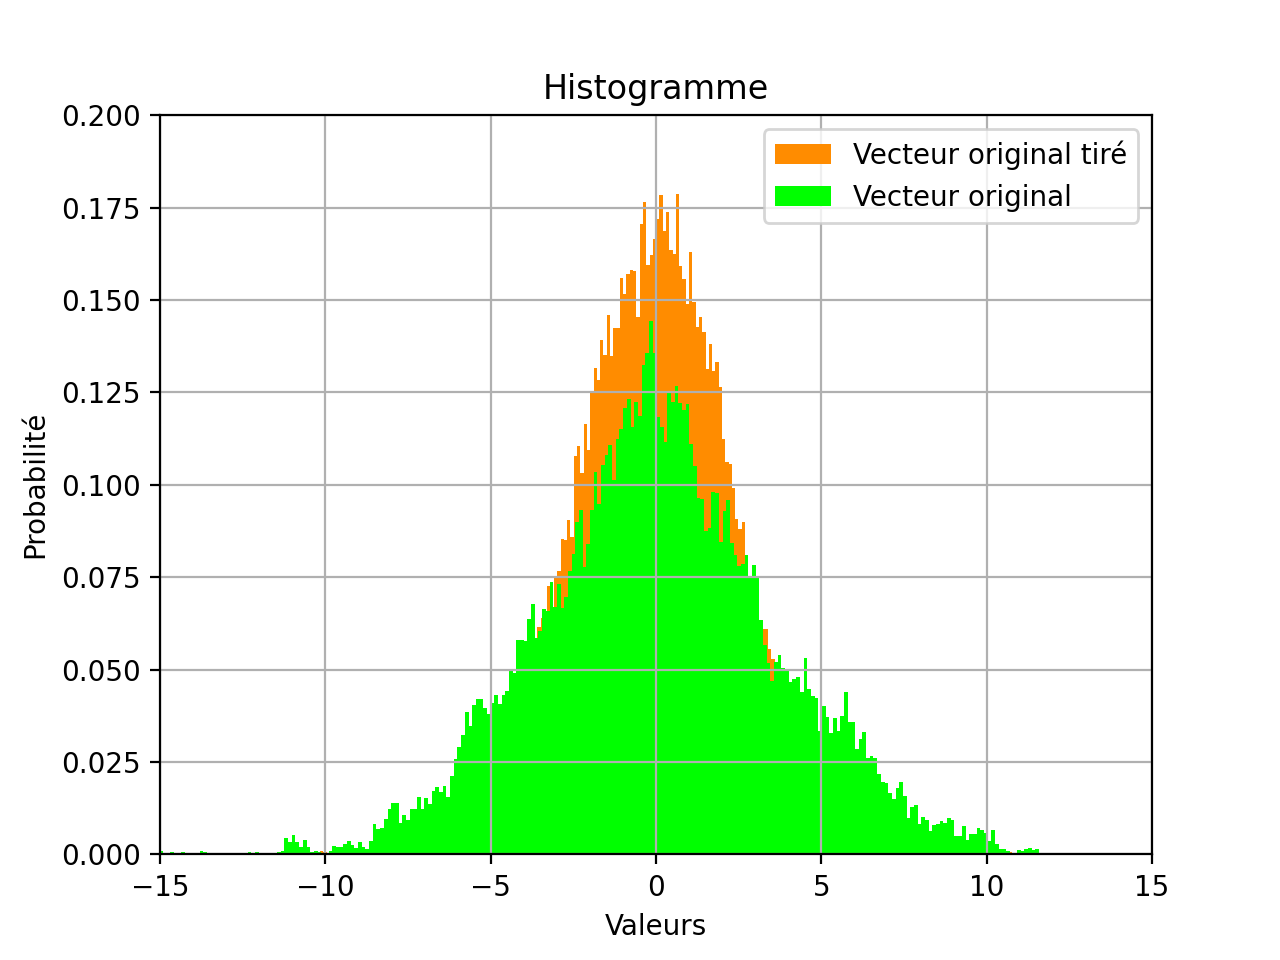

In [44]:
fig = plt.figure()
vect1 = x[0]
vect2 = x_hat[0]
plt.hist(vect2, bins = 250, color='darkorange', density=True, label='Vecteur original tiré')
plt.hist(vect1, bins = 250, color='lime', density=True, label='Vecteur original')

plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.title('Histogramme')
plt.xlim(-15, 15)
plt.ylim(0, 0.2)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()
plt.savefig("true1")
plt.close()

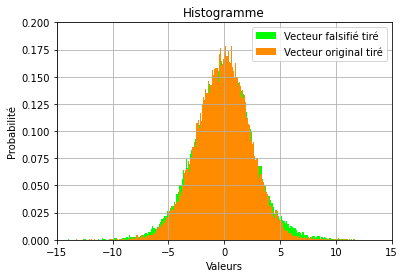

<Figure size 432x288 with 0 Axes>

In [38]:
fig = plt.figure()
vect1 = x_hat[2]
vect2 = x_hat[0]
plt.hist(vect1, bins = 250, color='lime', density=True, label='Vecteur falsifié tiré')
plt.hist(vect2, bins = 250, color='darkorange', density=True, label='Vecteur original tiré')


plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.title('Histogramme')
plt.xlim(-15, 15)
plt.ylim(0, 0.2)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()
plt.savefig("supp")
plt.close()